<a href="https://colab.research.google.com/github/shrutiiiyadav/CodeClause_Loan_prediction/blob/main/Mobile_Data_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the basic librarires
import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display

from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)

In [ ]:
#Importing the dataset

df = pd.read_csv("/content/AUM_V4_Usage_2024-03-14_12-54-09.csv")
#df.drop([''],axis=1, inplace=True)

target = 'spam'
labels = ['Ham','Spam']
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,App name,Usage time,Access count
0,Instagram,0:27:26,15.0
1,AJIO,0:14:37,1.0
2,Snapchat,0:13:44,17.0
3,WhatsApp,0:10:07,31.0
4,My Files,0:07:44,19.0



Inference: The Datset consists of 3 features & 32 samples.


In [ ]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   App name      30 non-null     object 
 1   Usage time    28 non-null     object 
 2   Access count  26 non-null     float64
dtypes: float64(1), object(2)
memory usage: 896.0+ bytes


In [ ]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   App name      30 non-null     object 
 1   Usage time    28 non-null     object 
 2   Access count  26 non-null     float64
dtypes: float64(1), object(2)
memory usage: 896.0+ bytes


In [ ]:
df.shape

(32, 3)

In [ ]:
df.head()

,App name,Usage time,Access count
0,Instagram,0:27:26,15.0
1,AJIO,0:14:37,1.0
2,Snapchat,0:13:44,17.0
3,WhatsApp,0:10:07,31.0
4,My Files,0:07:44,19.0


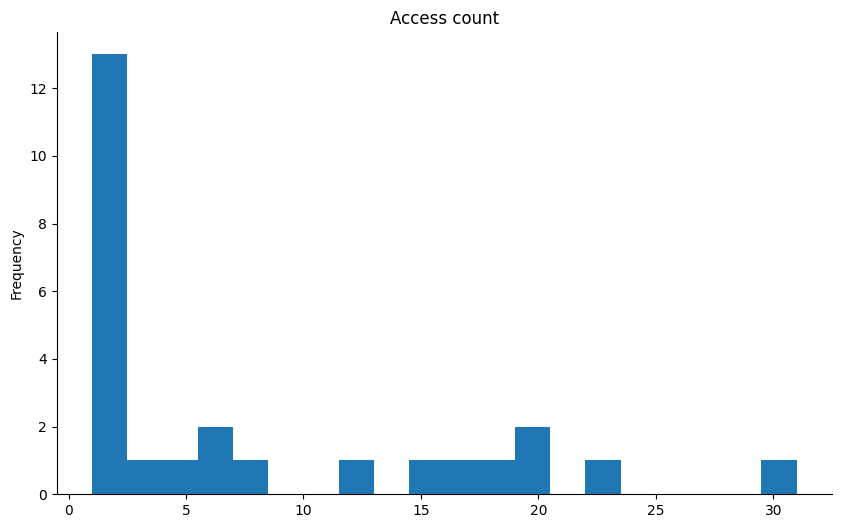

In [ ]:
# @title Access count

from matplotlib import pyplot as plt
df['Access count'].plot(kind='hist', bins=20, title='Access count')
plt.gca().spines[['top', 'right',]].set_visible(False)

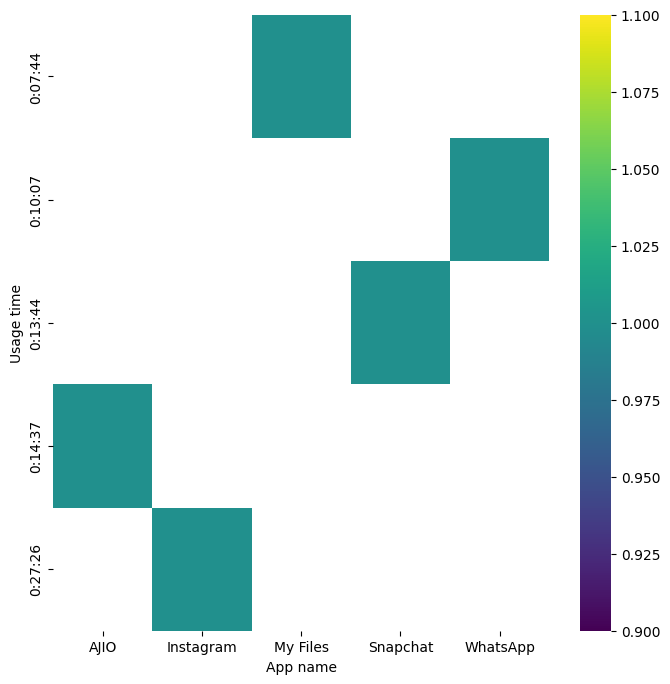

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Usage time'].value_counts()
    for x_label, grp in _df_8.groupby('App name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('App name')
_ = plt.ylabel('Usage time')